<a href="https://colab.research.google.com/github/Tkag0001/Practice-ML-with-Digit-recognize-problem/blob/main/code/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Recognizing handwritten digits
Data resources: https://www.kaggle.com/c/digit-recognizer

#Connect to drive:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Import packages:

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print(np.__version__)
print(sns.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.23.5
0.12.2
1.5.3
3.7.1


#Loading the dataset:


unzip data

In [ ]:
!unzip '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip' -d '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data'

Archive:  /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/sample_submission.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv  


## Note: pls change url to your data folder

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv')

In [ ]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (42000, 785)
test size: (28000, 784)


#Visualize data

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
X_train = train.drop(labels=['label'],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


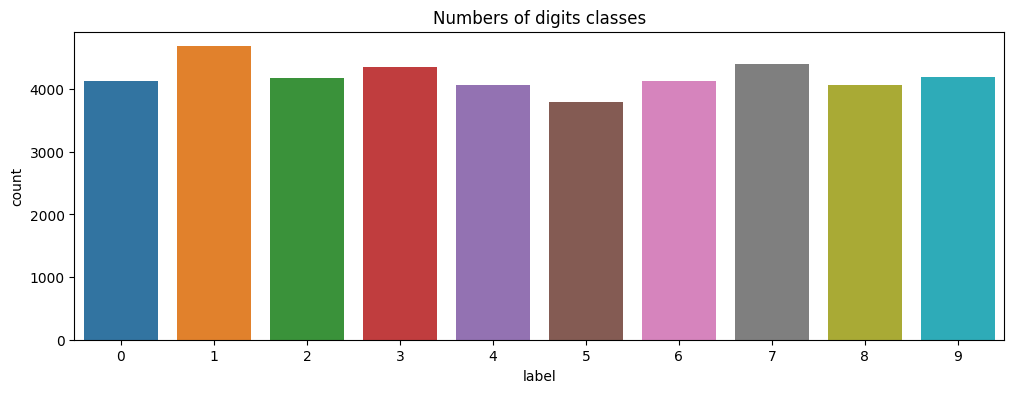

In [ ]:
plt.figure(figsize=(12,4))
g = sns.countplot(x=y_train)
plt.title("Numbers of digits classes")
print(y_train.value_counts())
plt.show()

In [ ]:
print(type(y_train[0]))

<class 'numpy.int64'>


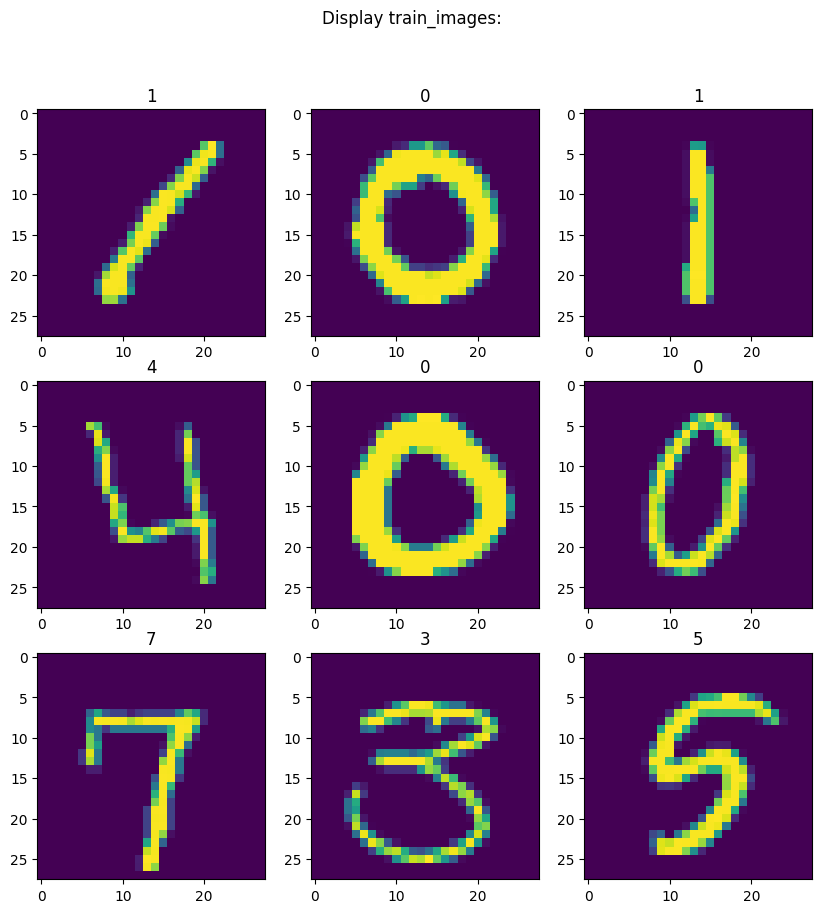

In [ ]:
# Display images

fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize = (10,10))
ax = axs.ravel()
for i in range(9):
  data_image = X_train.iloc[i]
  img = data_image.values
  # img = img.as_matrix()
  img = img.reshape((28,28))
  ax[i].imshow(img,aspect="auto")
  # title = y_train[i].astype(str)
  ax[i].set_title(y_train[i])
fig.suptitle("Display train_images:")
plt.show()

#Normalize, Reshape and Label Endcoding:
Why do we have to do them?

##Normalize data:


1.   We normalize data with grayscale to reduce the effect of illumination's differences.
2.   CNN model can work faster when we perform nomalization



In [ ]:
X_train = X_train/255.0
test = test/255.0

print(f"X_train shape: {X_train.shape}")
X_train.info()
print(f"\nTest shape: {test.shape}")
test.info()

X_train shape: (42000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB

Test shape: (28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB


##Reshape data:


1.   Train and test images are currently 2D matrix(28 x 28), we reshape all to 3D matrix(28 x 28 x 1)
2.   Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.



In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (42000, 28, 28, 1)
y_train: (42000,)


##Label Encoding:
Encode labels to one hot vectors

In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.12.0


In [ ]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, num_classes = 10)

In [ ]:
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


#Train Test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.1,random_state =2)

In [ ]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"\nX_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")


X_train.shape: (37800, 28, 28, 1)
y_train.shape: (37800, 10)

X_val.shape: (4200, 28, 28, 1)
y_val.shape: (4200, 10)


Text(0.5, 0.98, 'Data image')

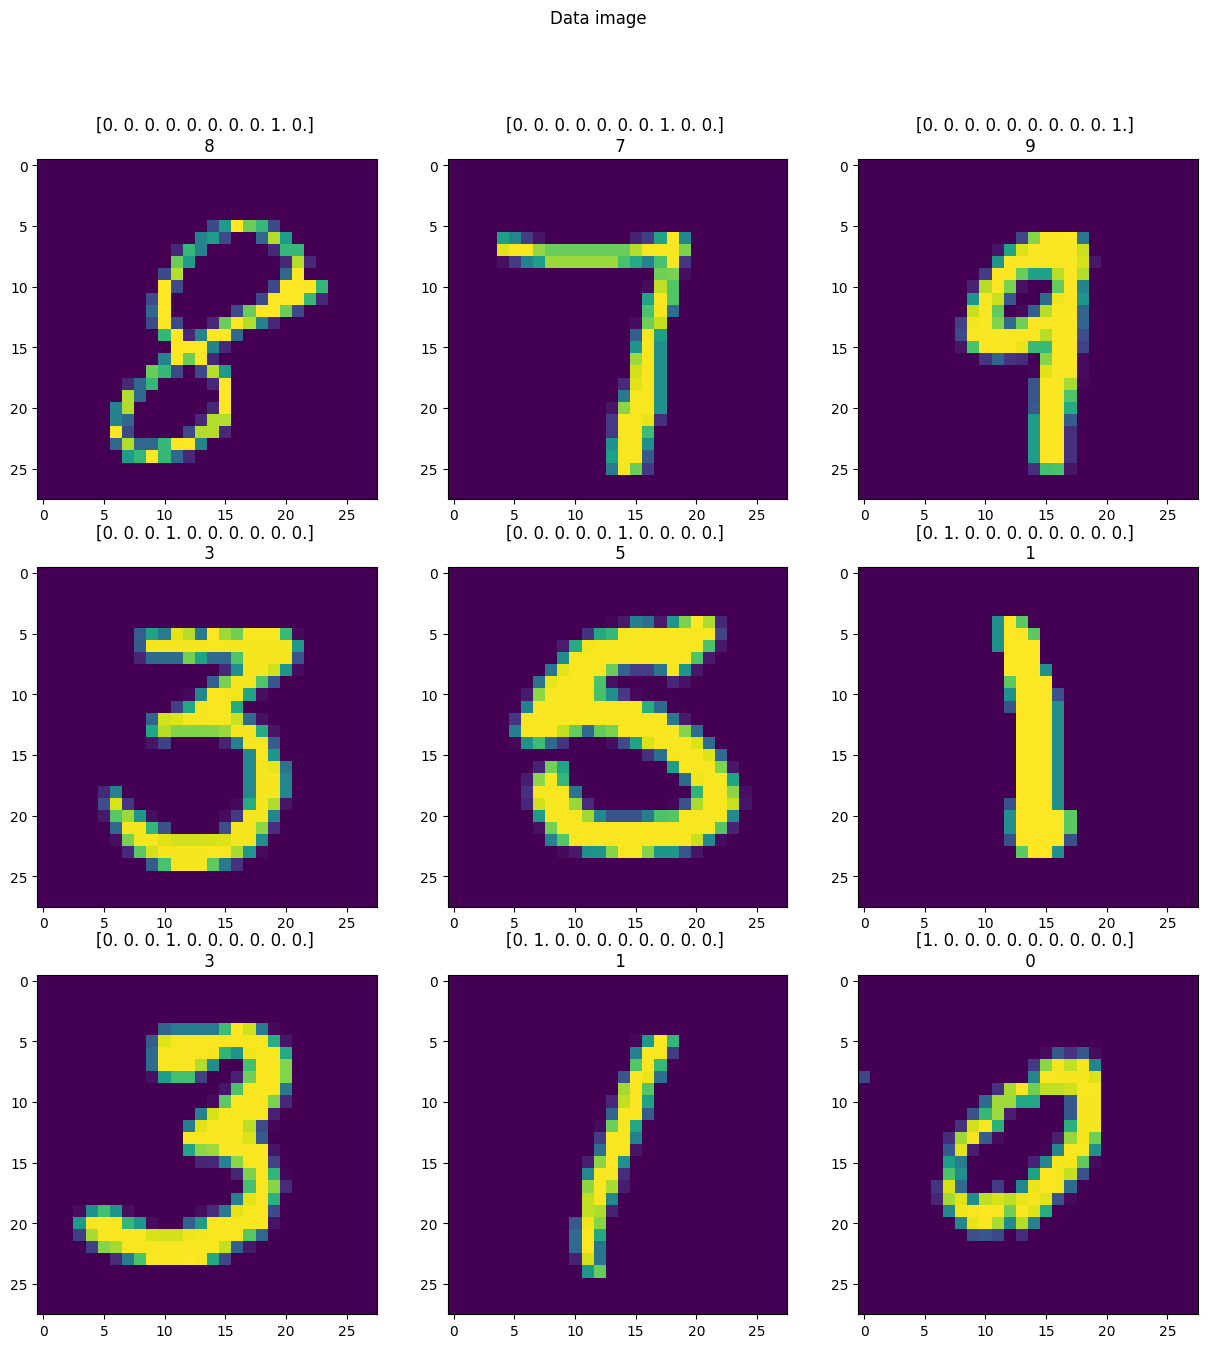

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(X_train[i][:,:,0])
  axs[i].set_title(f"{y_train[i]} \n {np.argmax(y_train[i])}")
fig.suptitle("Data image")

#Build model:

##Architecture of model:
 Conv2D  --> MaxPool2D --> Drop out --> Conv2D --> MaxPool2D
--> Drop out --> Fully connected(Relu, Softmax)









In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Create model:

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size= (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size= (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [ ]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

###Epochs and Batch Size

In [ ]:
epochs = 30
batch_size = 128 # 2^x

##Visualize model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

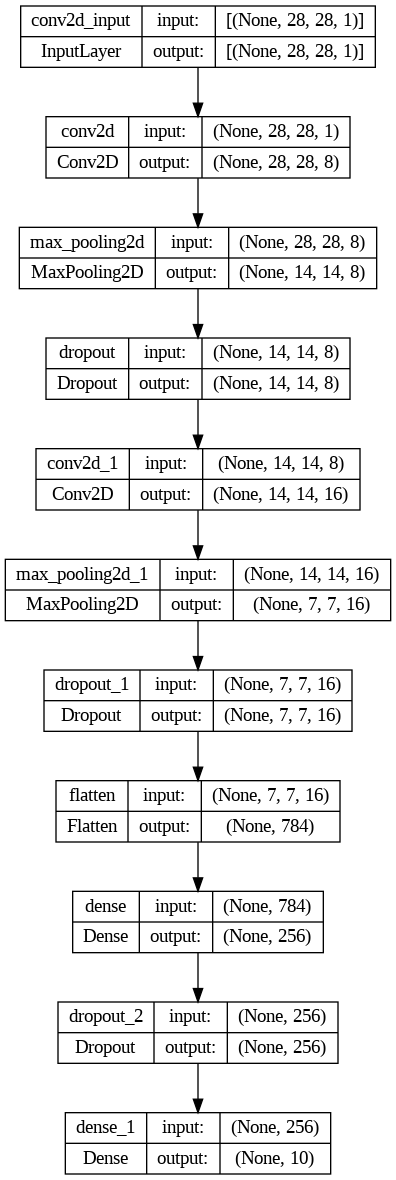

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'digits_model.png',show_shapes = True)

#Data augmentation:


*   We perform data augmentation to create more data in a lot of situation, then we can avoid overfiting data.
*   Ex: rotate image, zoom, cut, flip, ....
Note that: Don't flip vertically, becaue fliping vertically 6 is 9



In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [ ]:
print(X_train.shape)

(37800, 28, 28, 1)


In [ ]:
history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,
                                validation_data = (X_val,y_val), steps_per_epoch = X_train.shape[0]//batch_size)

Epoch 1/30


<ipython-input-32-33a387a8a4e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,


295/295 [==============================] - 44s 146ms/step - loss: 0.9062 - accuracy: 0.6977 - val_loss: 0.1569 - val_accuracy: 0.9581
Epoch 2/30
295/295 [==============================] - 42s 143ms/step - loss: 0.3521 - accuracy: 0.8888 - val_loss: 0.1042 - val_accuracy: 0.9717
Epoch 3/30
295/295 [==============================] - 42s 142ms/step - loss: 0.2698 - accuracy: 0.9163 - val_loss: 0.0855 - val_accuracy: 0.9738
Epoch 4/30
295/295 [==============================] - 47s 159ms/step - loss: 0.2286 - accuracy: 0.9298 - val_loss: 0.0739 - val_accuracy: 0.9779
Epoch 5/30
295/295 [==============================] - 43s 144ms/step - loss: 0.2071 - accuracy: 0.9354 - val_loss: 0.0651 - val_accuracy: 0.9817
Epoch 6/30
295/295 [==============================] - 43s 147ms/step - loss: 0.1912 - accuracy: 0.9406 - val_loss: 0.0618 - val_accuracy: 0.9819
Epoch 7/30
295/295 [==============================] - 44s 150ms/step - loss: 0.1791 - accuracy: 0.9452 - val_loss: 0.0595 - val_accuracy: 0.9

#Predicted test_data with model:


In [ ]:
res = model.predict(test)

875/875 [==============================] - 11s 12ms/step


In [ ]:
res = np.argmax(res, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

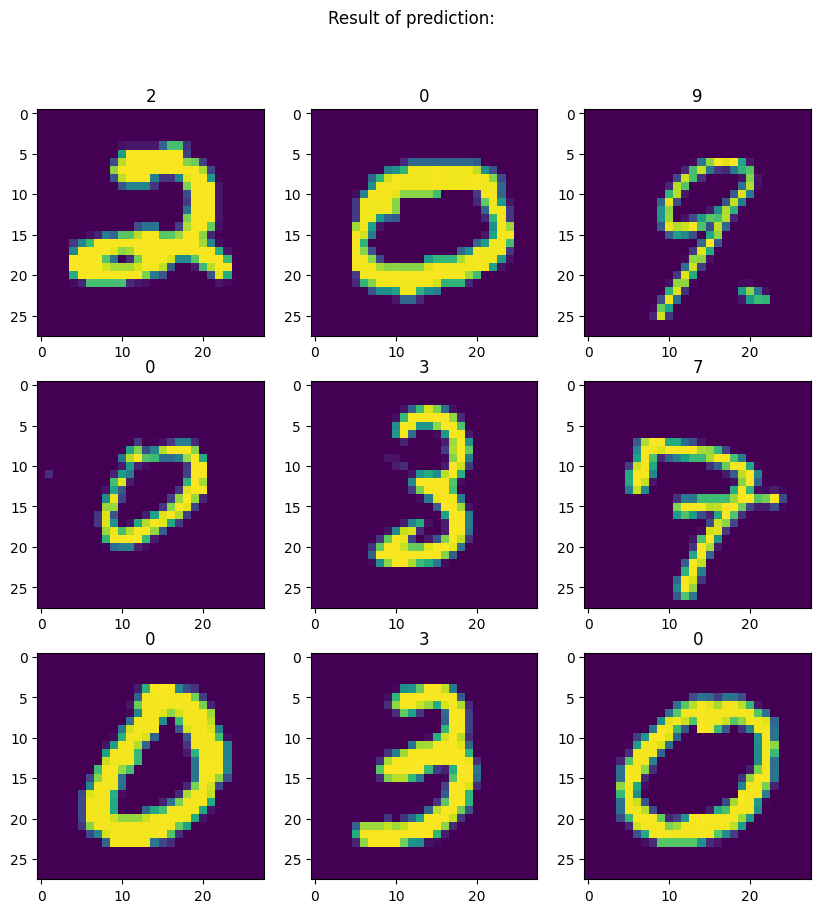

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,0])
  axs[i].set_title(res[i])
fig.suptitle("Result of prediction:")

##Evaluate model:
We will evaluate this model with loss and accuracy of validation data

In [ ]:
history1.history

{'loss': [0.9061594009399414,
  0.35212454199790955,
  0.26980775594711304,
  0.2286270409822464,
  0.20710308849811554,
  0.19115671515464783,
  0.17909960448741913,
  0.1674506515264511,
  0.15582425892353058,
  0.1534750908613205,
  0.14506785571575165,
  0.13836558163166046,
  0.1325034499168396,
  0.1289772242307663,
  0.12465404719114304,
  0.12610600888729095,
  0.11489618569612503,
  0.12169481068849564,
  0.11736764758825302,
  0.1148356944322586,
  0.11354559659957886,
  0.10724594444036484,
  0.11079408973455429,
  0.10688681900501251,
  0.10407858341932297,
  0.1024913340806961,
  0.10286350548267365,
  0.10421231389045715,
  0.09943686425685883,
  0.09600076824426651],
 'accuracy': [0.6977330446243286,
  0.8888033628463745,
  0.9162773489952087,
  0.9297621846199036,
  0.9354162216186523,
  0.9405659437179565,
  0.9451847672462463,
  0.9495115876197815,
  0.9521926045417786,
  0.9523518681526184,
  0.9556699991226196,
  0.9582979679107666,
  0.9587226510047913,
  0.9599702

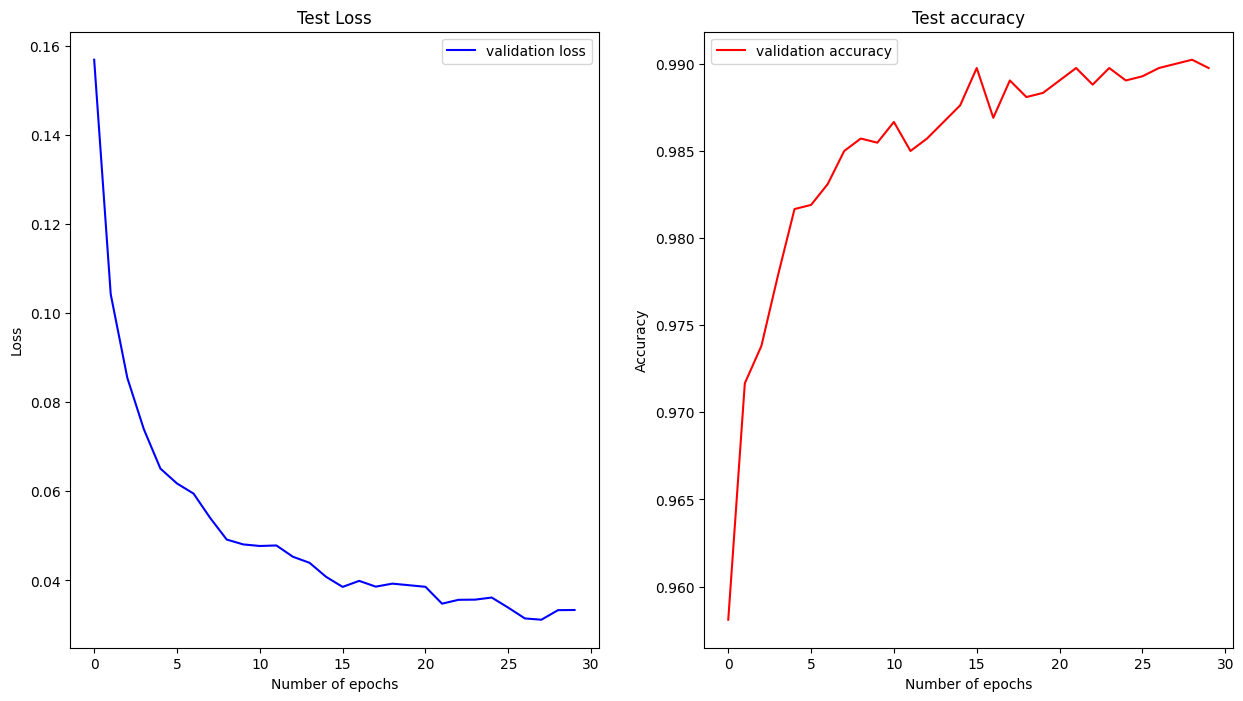

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(15,8))
ax = ax.ravel()
#val_loss
ax[0].plot(history1.history['val_loss'],color = 'b',label = 'validation loss')
ax[0].set_title("Test Loss")
ax[0].set(xlabel = "Number of epochs", ylabel = "Loss")
ax[0].legend()

#val_accuracy
ax[1].plot(history1.history['val_accuracy'],color = 'r',label = 'validation accuracy')
ax[1].set_title("Test accuracy")
ax[1].set(xlabel = "Number of epochs", ylabel = "Accuracy")
ax[1].legend()

plt.show()

##Save the model:

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#with h5 file
model.save('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.h5')

In [ ]:
saved_model = load_model('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.h5')

In [ ]:
res_of_SModel = saved_model.predict(test)

875/875 [==============================] - 17s 19ms/step


In [ ]:
res_of_SModel = np.argmax(res_of_SModel, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

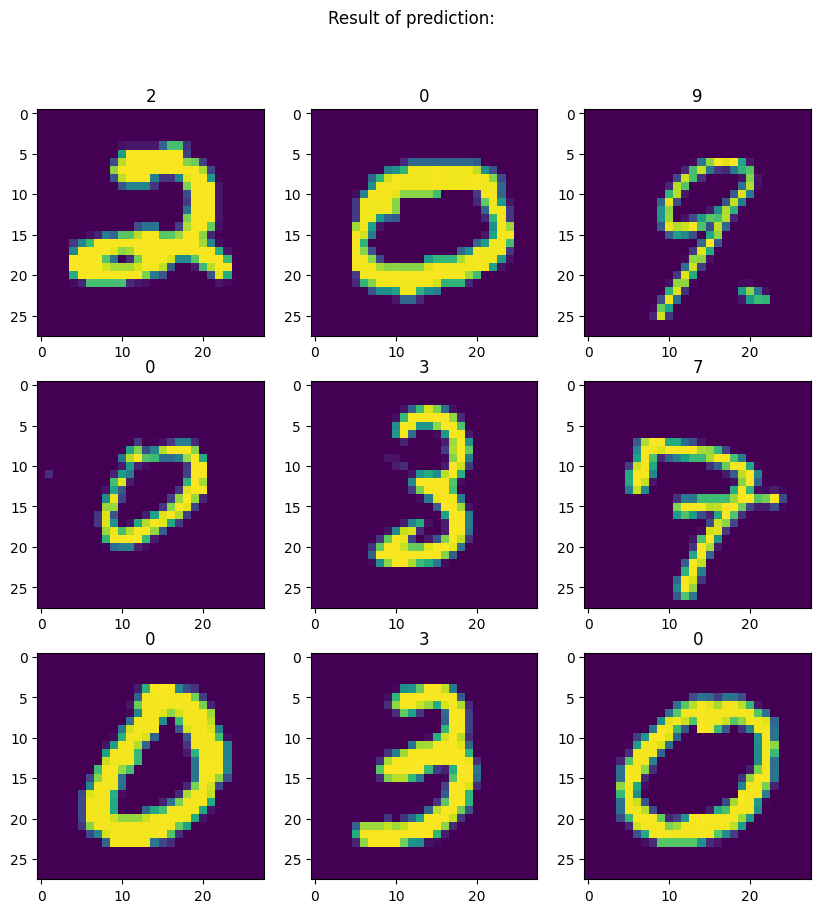

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,0])
  axs[i].set_title(res_of_SModel[i])
fig.suptitle("Result of prediction:")

In [ ]:
import pickle

In [ ]:
print(pickle.format_version)

4.0


In [ ]:
#save model with pickle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
#open saved_model with pikle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model1.pkl','rb') as f:
  saved_model_pkl = pickle.load(f)

In [ ]:
res_of_SModel_pkl = saved_model_pkl.predict(test)
res_of_SModel_pkl = np.argmax(res_of_SModel_pkl,axis = 1)
print(res_of_SModel_pkl)

875/875 [==============================] - 12s 13ms/step
[2 0 9 ... 3 9 2]


#Test with an image

In [ ]:
import cv2

In [ ]:
original_img = cv2.imread('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data//test_image.png',1)
img = cv2.imread('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data//test_image.png',0)
# cv2.imshow("picture:",img)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# cv2.imshow("picture after thresh_gaussian",pic)
ret,pic = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
# cv2.imshow("picture after all processing",pic)

pic = 255-pic
pic_scaled = pic/255.0

pic_scaled = pic.reshape(-1,28,28,1)

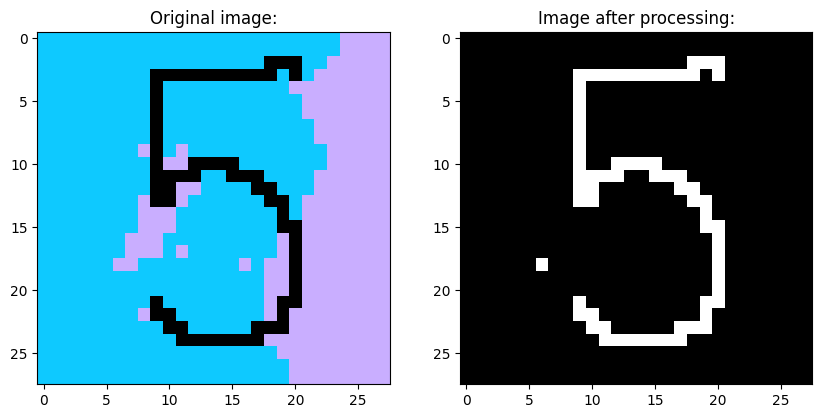

In [ ]:
fig,axis = plt.subplots(nrows = 1, ncols = 2,figsize = (10,8))
ax = axis.ravel()
ax[0].imshow(original_img)
ax[0].set_title("Original image:")

ax[1].imshow(pic,cmap='gray')
ax[1].set_title("Image after processing:")
plt.show()

In [ ]:
tmp = saved_model.predict(pic_scaled)
pic_predict = np.argmax(tmp,axis=1)
print(f"Number of prediction: {pic_predict}")
# cv2.waitKey(0)
# cv2.destroyWindow()

1/1 [==============================] - 0s 138ms/step
Number of prediction: [5]
